In [3]:
!pip install keras
!pip install tensorflow

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [6]:
from keras.applications.resnet import ResNet50

from keras.applications.resnet50 import preprocess_input

In [7]:
## get the data
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week3.zip

--2021-06-03 05:05:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week3.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261482368 (249M) [application/zip]
Saving to: ‘concrete_data_week3.zip’

concrete_data_week3 100%[===================>] 249.37M  35.1MB/s    in 7.1s    

2021-06-03 05:05:36 (35.4 MB/s) - ‘concrete_data_week3.zip’ saved [261482368/261482368]



In [8]:
!unzip concrete_data_week3.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/concrete_data_week3/train/negative/._06818.jpg  
  inflating: concrete_data_week3/train/negative/08835.jpg  
  inflating: __MACOSX/concrete_data_week3/train/negative/._08835.jpg  
  inflating: concrete_data_week3/train/negative/08821.jpg  
  inflating: __MACOSX/concrete_data_week3/train/negative/._08821.jpg  
  inflating: concrete_data_week3/train/negative/03974.jpg  
  inflating: __MACOSX/concrete_data_week3/train/negative/._03974.jpg  
  inflating: concrete_data_week3/train/negative/12879.jpg  
  inflating: __MACOSX/concrete_data_week3/train/negative/._12879.jpg  
  inflating: concrete_data_week3/train/negative/09281.jpg  
  inflating: __MACOSX/concrete_data_week3/train/negative/._09281.jpg  
  inflating: concrete_data_week3/train/negative/10908.jpg  
  inflating: __MACOSX/concrete_data_week3/train/negative/._10908.jpg  
  inflating: concrete_data_week3/train/negative/01805.jpg  
  inflating: __MACOSX/concrete_d

In [9]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [10]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [11]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week3/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [12]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week3/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 10001 images belonging to 2 classes.


In [13]:
model = Sequential()

In [14]:
model.add(ResNet50(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

94781440/94765736 [==============================] - 1s 0us/step


In [15]:
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.layers

In [17]:
model.layers[0].layers

In [18]:
model.layers[0].trainable = False

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [22]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
301/301 [==============================] - 180s 423ms/step - loss: 0.1208 - accuracy: 0.9410 - val_loss: 0.0083 - val_accuracy: 0.9978
Epoch 2/2
301/301 [==============================] - 128s 426ms/step - loss: 0.0076 - accuracy: 0.9982 - val_loss: 0.0053 - val_accuracy: 0.9989


In [23]:

model.save('classifier_resnet_model.h5')
#model.save('saved_model/classifier_resnet_model') 

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:
import tensorflow as tf
from keras.models import load_model
resnet_model = load_model('classifier_resnet_model.h5')

# New Section

In [25]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


## week 4:

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [26]:
!wget  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

--2021-06-03 05:15:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261483817 (249M) [application/zip]
Saving to: ‘concrete_data_week4.zip’

concrete_data_week4 100%[===================>] 249.37M  31.7MB/s    in 7.8s    

2021-06-03 05:16:04 (32.1 MB/s) - ‘concrete_data_week4.zip’ saved [261483817/261483817]



In [27]:
!unzip concrete_data_week4.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/concrete_data_week4/train/negative/._06818.jpg  
  inflating: concrete_data_week4/train/negative/08835.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._08835.jpg  
  inflating: concrete_data_week4/train/negative/08821.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._08821.jpg  
  inflating: concrete_data_week4/train/negative/03974.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._03974.jpg  
  inflating: concrete_data_week4/train/negative/12879.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._12879.jpg  
  inflating: concrete_data_week4/train/negative/09281.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._09281.jpg  
  inflating: concrete_data_week4/train/negative/10908.jpg  
  inflating: __MACOSX/concrete_data_week4/train/negative/._10908.jpg  
  inflating: concrete_data_week4/train/negative/01805.jpg  
  inflating: __MACOSX/concrete_d

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

In [25]:
!ls ./concrete_data_week4

test  train  valid


## Part 1:

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

In [28]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [29]:
num_classes = 2

image_resize = 224

batch_size_training = 100
batch_size_validation = 100

In [30]:
data_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [31]:
train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_training,
    class_mode='categorical')

Found 30001 images belonging to 2 classes.


In [32]:
validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size=(image_resize, image_resize),
    batch_size=batch_size_validation,
    class_mode='categorical')

Found 9501 images belonging to 2 classes.


In [33]:
vgg_model = Sequential()

In [34]:
vgg_model.add(VGG16(
    include_top=False,
    pooling='avg',
    weights='imagenet',
    ))

58900480/58889256 [==============================] - 0s 0us/step


In [35]:
vgg_model.add(Dense(num_classes, activation='softmax'))

In [36]:
vgg_model.layers

In [37]:
vgg_model.layers[0].trainable = False

In [38]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [39]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [41]:
fit_history = vgg_model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch_training,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=steps_per_epoch_validation,
    verbose=1,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
301/301 [==============================] - 179s 543ms/step - loss: 0.3502 - accuracy: 0.8363 - val_loss: 0.0279 - val_accuracy: 0.9936
Epoch 2/2
301/301 [==============================] - 171s 567ms/step - loss: 0.0235 - accuracy: 0.9950 - val_loss: 0.0164 - val_accuracy: 0.9961


In [42]:
vgg_model.save('classifier_vgg_model.h5')

## part 2:

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


In [43]:
test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size=(image_resize, image_resize),
    shuffle=False,
    class_mode='categorical',
    batch_size=1)

Found 500 images belonging to 2 classes.


In [44]:
scores_vgg16 = vgg_model.evaluate(test_generator)
scores_resnet = resnet_model.evaluate(test_generator)


500/500 [==============================] - 10s 12ms/step - loss: 0.0026 - accuracy: 1.0000


In [45]:
print(scores_vgg16[1])
print(scores_resnet[1])

0.9959999918937683
1.0


In [46]:
score_gen_resnet = resnet_model.evaluate_generator(test_generator)

score_gen_vgg = vgg_model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [47]:
print('the performance of the classifier using the ResNet pre-trained model:',score_gen_resnet[1])
print('the performance of the classifier using the VGG16 pre-trained model:',score_gen_vgg[1])

the performance of the classifier using the ResNet pre-trained model: 1.0
the performance of the classifier using the VGG16 pre-trained model: 0.9959999918937683


## Part 3:

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

In [58]:
predict_vgg = vgg_model.predict_generator(test_generator,10)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [59]:
predict_vgg

array([[9.9611062e-01, 3.8893411e-03],
       [6.8330336e-01, 3.1669664e-01],
       [9.4073224e-01, 5.9267744e-02],
       [9.7809893e-01, 2.1901086e-02],
       [9.8233205e-01, 1.7667970e-02],
       [9.6967399e-01, 3.0325985e-02],
       [9.9952734e-01, 4.7262348e-04],
       [9.8266506e-01, 1.7334942e-02],
       [9.9428165e-01, 5.7183867e-03],
       [9.9741274e-01, 2.5872320e-03]], dtype=float32)

In [54]:
import matplotlib.pyplot as plt

Negative


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


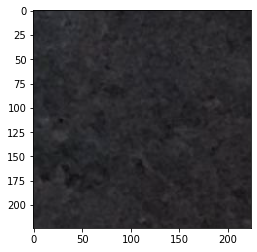

Negative


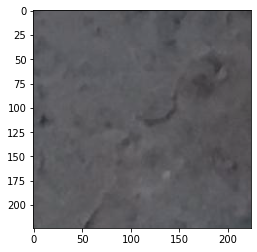

Negative


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


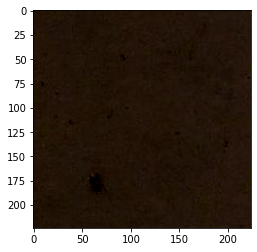

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Negative


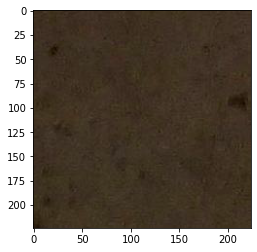

Negative


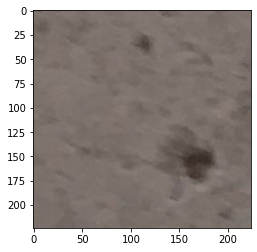

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Negative


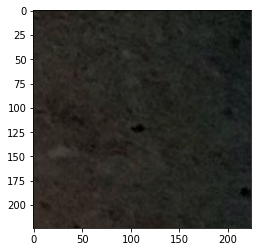

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Negative


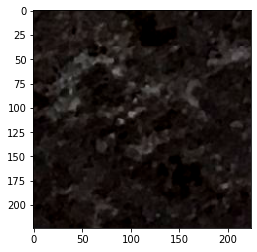

Negative


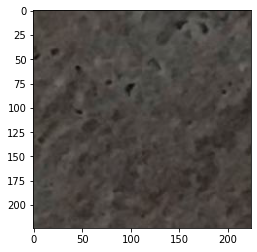

Negative


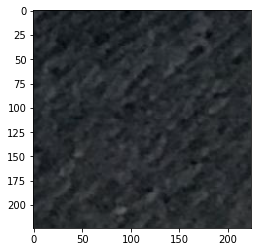

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Negative


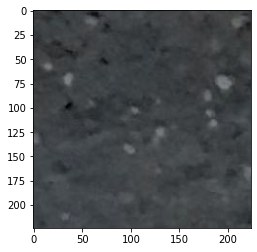

In [57]:
for i in range(0,10):
  batchh=test_generator.next()
  x=batchh[0]
  y=batchh[1]
  predict=vgg_model.predict_generator(x)
  #print(predict)
  #print(predict.argmax(1))
  #print(y)
  if predict.argmax(1)==[0]:
    print('Negative')
  else:
    print('Positive')
  fig,ax=plt.subplots()
  ax.imshow(x[0]/255)
  plt.show()


In [58]:
len(test_generator.next()[1])

32